In [1]:
#import all necessary packages

import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns; sns.set()
from sklearn import tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
import graphviz 
from math import sqrt

In [2]:
#Import data frame with standardized revenues and expenditures per school district
std_districts_FL = pd.read_csv(r"..\Data\Florida data\District Finances\FL_District_Finances.csv", index_col=0)

std_districts_FL.head()

,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
0,ALACHUA COUNTY SCHOOL DISTRICT,2016,9.702167,1.270125,4.333970,4.098072,9.340386,4.968435,3.352738,0.626344,0.328715
1,BAKER COUNTY SCHOOL DISTRICT,2016,8.530388,0.965414,6.065374,1.499600,8.362055,4.367453,3.266693,0.565974,0.145542
2,BAY COUNTY SCHOOL DISTRICT,2016,9.979338,0.934416,3.981534,5.063389,9.527591,5.411936,2.667003,0.541305,0.797883
3,BRADFORD COUNTY SCHOOL DISTRICT,2016,10.011229,1.574860,5.697130,2.739239,9.352776,5.072052,3.243606,0.945415,0.083593
4,BREVARD COUNTY SCHOOL DISTRICT,2016,9.968929,1.037302,4.560299,4.371328,9.390130,5.292529,2.829184,0.455725,0.526518


In [3]:
#Import data frame with crime rates per county 

FL_juv_crime_rate = pd.read_csv(r"..\Data\Florida data\Juvenile Crime by County\FL_Juvenile_crime_rate.csv", index_col=0)
FL_juv_crime_rate.head()

,Year,COUNTY NAME,TOTAL ARRESTS,JUVENILE POP,CRIME RATE
0,1998,Alachua,1854,44683,4.149229
1,1998,Baker,114,6129,1.860010
2,1998,Bay,1898,36257,5.234851
3,1998,Bradford,62,5861,1.057840
4,1998,Brevard,4721,104005,4.539205


In [4]:
#Summarize the crime rate

FL_juv_crime_rate.describe()['CRIME RATE']

count    1340.000000
mean        2.431224
std         1.414271
min         0.062189
25%         1.427326
50%         2.215869
75%         3.198266
max        15.782778
Name: CRIME RATE, dtype: float64

In [5]:
FL_juv_crime_rate['COUNTY NAME'].unique()

array(['Alachua', 'Baker', 'Bay', 'Bradford', 'Brevard', 'Broward',
       'Calhoun', 'Charlotte', 'Citrus', 'Clay', 'Collier', 'Columbia',
       'Desoto', 'Dixie', 'Duval', 'Escambia', 'Flagler', 'Franklin',
       'Gadsden', 'Gilchrist', 'Glades', 'Gulf', 'Hamilton', 'Hardee',
       'Hendry', 'Hernando', 'Highlands', 'Hillsborough', 'Holmes',
       'Indian River', 'Jackson', 'Jefferson', 'Lafayette', 'Lake', 'Lee',
       'Leon', 'Levy', 'Liberty', 'Madison', 'Manatee', 'Marion',
       'Martin', 'Miami-Dade', 'Monroe', 'Nassau', 'Okaloosa',
       'Okeechobee', 'Orange', 'Osecola', 'Palm Beach', 'Pasco',
       'Pinellas', 'Polk', 'Putnam', 'Santa Rosa', 'Sarasota', 'Seminole',
       'St. Johns', 'St. Lucie', 'Sumter', 'Suwannee', 'Taylor', 'Union',
       'Volusia', 'Wakulla', 'Walton', 'Washington'], dtype=object)

In [6]:
#Make sure there are the correct number of counties

len(FL_juv_crime_rate['COUNTY NAME'].unique())

67

In [7]:
#Average crime rate by county
avg_crime = FL_juv_crime_rate.groupby(['COUNTY NAME']).mean()
avg_crime.head()

,Year,TOTAL ARRESTS,JUVENILE POP,CRIME RATE
COUNTY NAME,,,,
Alachua,2007.5,1564.00,44680.25,3.529299
Baker,2007.5,124.05,6631.75,1.902121
Bay,2007.5,1576.80,37313.10,4.241130
Bradford,2007.5,83.65,5648.70,1.478973
Brevard,2007.5,4437.85,107220.00,4.128714


In [8]:

#pivot table 

crime_pivot= FL_juv_crime_rate.pivot(index='Year',columns='COUNTY NAME',values='CRIME RATE')
crime_pivot.head()

COUNTY NAME,Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,...,St. Johns,St. Lucie,Sumter,Suwannee,Taylor,Union,Volusia,Wakulla,Walton,Washington
Year,,,,,,,,,,,,,,,,,,,,,
1998,4.149229,1.860010,5.234851,1.057840,4.539205,3.720192,3.742271,4.460932,4.369369,4.041819,...,0.793819,1.535576,3.006708,2.624293,2.433993,0.925291,5.250042,3.759800,2.351585,0.552147
1999,4.829160,2.480697,4.308792,1.157567,6.271837,3.500740,1.776316,3.473103,2.899625,3.629393,...,0.919233,1.441806,2.676056,2.121285,2.268977,2.059419,3.405271,4.904162,2.880329,1.604387
2000,4.998176,2.550357,4.364812,1.031649,4.209743,3.310760,0.265957,2.813230,2.602558,2.641757,...,0.953118,1.498602,1.992032,2.361457,2.565190,1.597553,3.941056,4.852716,3.363533,2.259772
2001,5.524392,2.773699,4.969846,1.684211,4.553674,3.310276,3.304940,4.927370,3.099542,2.009789,...,0.761985,1.676797,2.253827,2.048264,2.413499,1.740614,4.282270,2.928453,2.400617,1.558389
2002,3.066648,2.787512,5.405105,2.044808,4.731325,3.288702,1.915840,5.276622,3.214729,2.985182,...,0.267213,2.019664,2.158622,1.765594,2.537961,2.286902,5.155053,1.375020,3.826937,1.376618


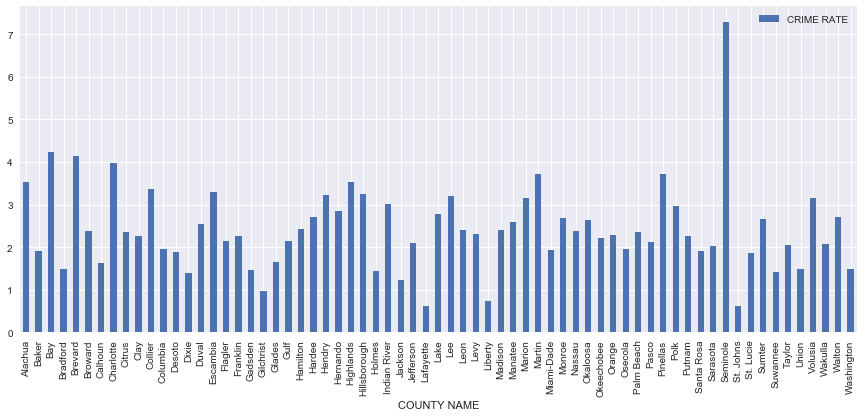

In [9]:
#Bar plot of average juvenile crime rate by state
avg_crime[['CRIME RATE']].plot(figsize=(15, 6),kind='bar')
plt.show()

In [10]:

avg_crime.reset_index(inplace=True)

#The 5 districs with the largest juvenile crime rates
top_5_counties = list(avg_crime.sort_values(by='CRIME RATE',ascending=False)['COUNTY NAME'].head(5))

In [11]:
top_5_counties

['Seminole', 'Bay', 'Brevard', 'Charlotte', 'Martin']

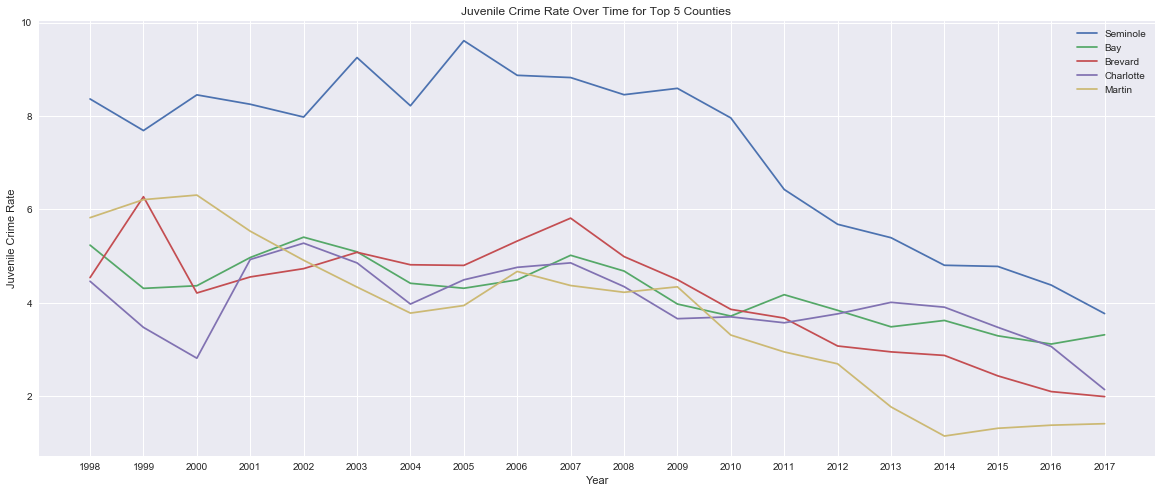

In [12]:

#Plot for top 5 districts/counties

plt.figure(figsize=(20, 8))
for d in top_5_counties:
    plt.plot(crime_pivot.index, crime_pivot[d], label = d)

plt.xlabel('Year')
plt.ylabel('Juvenile Crime Rate')
plt.xticks(np.arange(min(crime_pivot.index), max(crime_pivot.index)+1, 1.0))
plt.title('Juvenile Crime Rate Over Time for Top 5 Counties ')
plt.legend()

In [13]:
#Have both data set with the same range of years: 1998-2016
FL_juv_crime_rate = FL_juv_crime_rate.loc[FL_juv_crime_rate['Year'] != 2017]


In [14]:
#Pull out county names from the school districts
std_districts_FL['COUNTY NAME'] = std_districts_FL.NAME.str.title().str.split().str[0]


In [15]:
#This loop deals with the few exceptions that weren't covered in the previous command

for i, row in std_districts_FL.iterrows():
    for x in ["ST JOHNS", "ST LUCIE", "SANTA ROSA", "DE SOTO", "INDIAN RIVER"]:
        if x in std_districts_FL['NAME'][i]:
            std_districts_FL.at[i,'COUNTY NAME'] = x   
        

In [16]:
#Merge finances data set with the juvenile crime data set on the appropriate county and year

std_districts_FL.rename(columns={'YRDATA': 'Year'}, inplace=True)
juv_crime_vs_finances = std_districts_FL.merge(FL_juv_crime_rate, on=["COUNTY NAME","Year"], how = 'inner')

list(juv_crime_vs_finances)

['NAME',
 'Year',
 'TOTALREV',
 'TFEDREV',
 'TSTREV',
 'TLOCREV',
 'TOTALEXP',
 'TCURINST',
 'TCURSSVC',
 'TCURONON',
 'TCAPOUT',
 'COUNTY NAME',
 'TOTAL ARRESTS',
 'JUVENILE POP',
 'CRIME RATE']

In [17]:
#Reorder data set so that county and year are the leftmost columns

cols = ['COUNTY NAME',
     'Year',
     'TOTALREV',
     'TFEDREV',
     'TSTREV',
     'TLOCREV',
     'TOTALEXP',
     'TCURINST',
     'TCURSSVC',
     'TCURONON',
     'TCAPOUT',
     'TOTAL ARRESTS',
     'JUVENILE POP',
     'CRIME RATE']

juv_crime_vs_finances = juv_crime_vs_finances[cols]

In [18]:
#Preview merged data set

juv_crime_vs_finances.head()

,COUNTY NAME,Year,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT,TOTAL ARRESTS,JUVENILE POP,CRIME RATE
0,Alachua,2016,9.702167,1.270125,4.333970,4.098072,9.340386,4.968435,3.352738,0.626344,0.328715,730,47667,1.531458
1,Baker,2016,8.530388,0.965414,6.065374,1.499600,8.362055,4.367453,3.266693,0.565974,0.145542,77,6877,1.119674
2,Bay,2016,9.979338,0.934416,3.981534,5.063389,9.527591,5.411936,2.667003,0.541305,0.797883,1234,39597,3.116398
3,Bradford,2016,10.011229,1.574860,5.697130,2.739239,9.352776,5.072052,3.243606,0.945415,0.083593,60,5393,1.112553
4,Brevard,2016,9.968929,1.037302,4.560299,4.371328,9.390130,5.292529,2.829184,0.455725,0.526518,2250,107226,2.098372


In [19]:
#Save merged data set as csv file

juv_crime_vs_finances.to_csv(r"..\Data\Florida data\Merged_Datasets\juvenile_crime_vs_finances.csv")

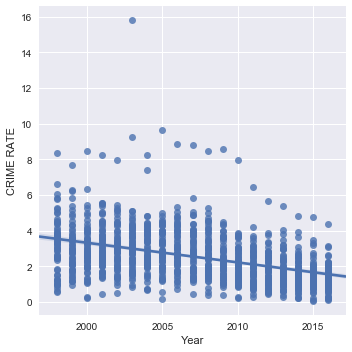

In [20]:

sns.lmplot(x = "Year", y = "CRIME RATE", data = juv_crime_vs_finances).set(xticks= [ 2000, 2005, 2010, 2015])

In [21]:
#Identify the outlier

print(juv_crime_vs_finances.loc[juv_crime_vs_finances['CRIME RATE'] > 10])

    COUNTY NAME  Year  TOTALREV   TFEDREV    TSTREV   TLOCREV  TOTALEXP  \
942      Nassau  2003  6.683661  0.501377  2.910377  3.271907  6.265167   

     TCURINST  TCURSSVC  TCURONON   TCAPOUT  TOTAL ARRESTS  JUVENILE POP  \
942  3.088104   2.10187  0.329156  0.712143           2357         14934   

     CRIME RATE  
942   15.782778  


In [22]:

#Linear model without a constant

cols_model = ['TFEDREV',
     'TSTREV',
     'TLOCREV',
     'TCURINST',
     'TCURSSVC',
     'TCURONON',
     'TCAPOUT',
     'Year']

X = juv_crime_vs_finances[cols_model]
y = juv_crime_vs_finances["CRIME RATE"]

#Create test/train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = sm.OLS(y_train, X_train).fit()

# Print out the statistics
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CRIME RATE   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     447.9
Date:                Sun, 02 Dec 2018   Prob (F-statistic):          1.73e-280
Time:                        23:56:07   Log-Likelihood:                -1233.0
No. Observations:                 762   AIC:                             2482.
Df Residuals:                     754   BIC:                             2519.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TFEDREV       -0.0339      0.155     -0.218      0.827      -0.339       0.271
TSTREV        -0.0872      0.063     -1.381      0.168      -0.211       0.037
TLOCREV        0.1535      0.063      2.441      0.015       0.030       0.277
TCURINST      -0.2800      0.096     -2.913      0.004      -0.469      -0.091
TCURSSVC      -0.6003      0.136     -4.402      0.000      -0.868      -0.333
TCURONON      -0.4344      0.249     -1.742      0.082      -0.924       0.055
TCAPOUT        0.0704      0.057      1.235      0.217      -0.041       0.182
Year           0.0028      0.000     20.873      0.000       0.002       0.003
==============================================================================
Omnibus:                      219.024   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.592
Skew:                           1.332   Prob(JB):                    1.56e-171
Kurtosis:                       7.205   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# make the predictions by the model

predictions = model.predict(X_test) 

rmse = sqrt(mean_squared_error(y_test, predictions))

print('RMSE:' + str(rmse))




RMSE:1.2977555448396996


In [24]:
#Remove features that were not relevant

cols_model2 = [
     'TLOCREV',
     'TCURINST',
     'TCURSSVC',
     'Year']

X = juv_crime_vs_finances[cols_model2]

y = juv_crime_vs_finances["CRIME RATE"]

#Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

rmse = sqrt(mean_squared_error(y_test, predictions))

print('RMSE:' + str(rmse))

# Print out the statistics
model.summary()


RMSE:1.293750047565588


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CRIME RATE   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     891.5
Date:                Sun, 02 Dec 2018   Prob (F-statistic):          7.84e-285
Time:                        23:56:07   Log-Likelihood:                -1236.2
No. Observations:                 762   AIC:                             2480.
Df Residuals:                     758   BIC:                             2499.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TLOCREV        0.2366      0.026      9.239      0.000       0.186       0.287
TCURINST      -0.3743      0.077     -4.862      0.000      -0.525      -0.223
TCURSSVC      -0.7078      0.101     -7.004      0.000      -0.906      -0.509
Year           0.0027      0.000     23.825      0.000       0.002       0.003
==============================================================================
Omnibus:                      224.532   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              833.118
Skew:                           1.355   Prob(JB):                    1.23e-181
Kurtosis:                       7.347   Cond. No.                     5.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\lisbe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


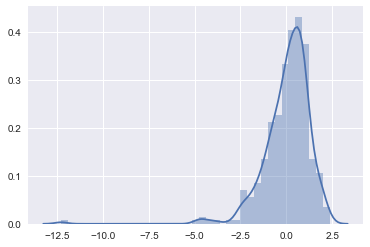

In [25]:
residuals = predictions - y_test

sns.distplot(residuals)

In [26]:
#Mixed Linear Model: Using same test and training sets

cols = ['TFEDREV',
     'TSTREV',
     'TLOCREV',
     'TCURINST',
     'TCURSSVC',
     'TCURONON',
     'TCAPOUT',
      'Year',
      'COUNTY NAME']

X = juv_crime_vs_finances[cols]
y = juv_crime_vs_finances["CRIME RATE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

cols_model = ['TFEDREV',
     'TSTREV',
     'TLOCREV',
     'TCURINST',
     'TCURSSVC',
     'TCURONON',
     'TCAPOUT',
      'Year']

groups = X_train["COUNTY NAME"]

model = sm.MixedLM(endog=y_train, exog=X_train[cols_model], groups=groups).fit()

predictions = model.predict(X_test[cols_model]) 

rmse = sqrt(mean_squared_error(y_test, predictions))

print('RMSE:' + str(rmse))

model.summary()



RMSE:1.3518660902261859


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: CRIME RATE
No. Observations: 762     Method:             REML      
No. Groups:       60      Scale:              0.5986    
Min. group size:  9       Likelihood:         -998.7343 
Max. group size:  17      Converged:          Yes       
Mean group size:  12.7                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
TFEDREV       -0.319    0.122 -2.626 0.009 -0.558 -0.081
TSTREV        -0.020    0.042 -0.469 0.639 -0.102  0.063
TLOCREV        0.090    0.056  1.607 0.108 -0.020  0.201
TCURINST      -0.496    0.088 -5.612 0.000 -0.669 -0.323
TCURSSVC       0.192    0.122  1.581 0.114 -0.046  0.431
TCURONON      -1.145    0.364 -3.144 0.002 -1.859 -0.431
TCAPOUT        0.065    0.037  1.779 0.075 -0.007  0.137
Year           0.002    0.000 20.340 0.000  0.002  0.003
Group Var      1.119    0.299                           
========================================================

"""

In [27]:
#Mixed Linear Model: Removing variable that had no relationship

cols2 = [ 'COUNTY NAME',
     'TLOCREV',
     'TCURINST',
     'TCURONON',
      'Year']


X = juv_crime_vs_finances[cols2]
y = juv_crime_vs_finances["CRIME RATE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


cols_model2 = [
     'TLOCREV',
     'TCURINST',
     'TCURONON',
      'Year']

groups = X_train["COUNTY NAME"]

model = sm.MixedLM(endog=y_train, exog=X_train[cols_model2], groups=groups).fit()

predictions = model.predict(X_test[cols_model2]) 

rmse = sqrt(mean_squared_error(y_test, predictions))

print('RMSE:' + str(rmse))

model.summary()



RMSE:1.3245595884318755


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: CRIME RATE
No. Observations: 762     Method:             REML      
No. Groups:       60      Scale:              0.6074    
Min. group size:  9       Likelihood:         -997.0904 
Max. group size:  17      Converged:          Yes       
Mean group size:  12.7                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
TLOCREV        0.166    0.043  3.888 0.000  0.082  0.249
TCURINST      -0.561    0.060 -9.326 0.000 -0.679 -0.443
TCURONON      -1.239    0.341 -3.638 0.000 -1.907 -0.571
Year           0.003    0.000 24.260 0.000  0.002  0.003
Group Var      1.071    0.279                           
========================================================

"""

C:\Users\lisbe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


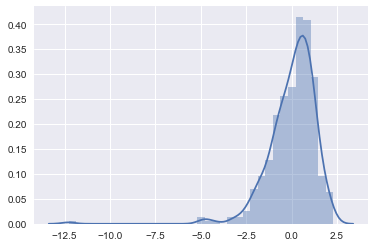

In [28]:
residuals = predictions - y_test

sns.distplot(residuals)

In [29]:
#Regression Tree

cols_model = ['TFEDREV',
     'TSTREV',
     'TLOCREV',
     'TCURINST',
     'TCURSSVC',
     'TCURONON',
     'TCAPOUT',
      'Year']


features=juv_crime_vs_finances[cols_model]

target = juv_crime_vs_finances['CRIME RATE']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

regressor = DecisionTreeRegressor(random_state=0, min_samples_leaf=5, max_depth=3)

model = regressor.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Score:" +str(model.score(X_test, y_test)))

rmse = sqrt(mean_squared_error(y_test, predictions))

print('RMSE:' + str(rmse))

Score:0.3297033297610493
RMSE:1.2682940207478095


C:\Users\lisbe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


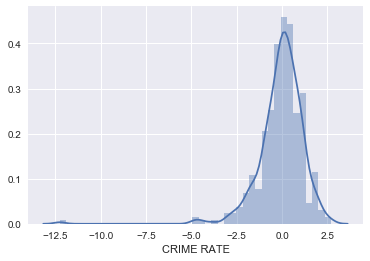

In [30]:
residuals = predictions - y_test

sns.distplot(residuals)

In [31]:

dot_data = tree.export_graphviz(model, out_file=None, feature_names=list(X_train)) 
graph = graphviz.Source(dot_data) 
#graph.render("tree3") 

In [32]:
#PCA

cols_model = ['TFEDREV',
     'TSTREV',
     'TLOCREV',
     'TCURINST',
     'TCURSSVC',
     'TCURONON',
     'TCAPOUT',
      'Year']

features=juv_crime_vs_finances[cols_model]

features.head()

,TFEDREV,TSTREV,TLOCREV,TCURINST,TCURSSVC,TCURONON,TCAPOUT,Year
0,1.270125,4.333970,4.098072,4.968435,3.352738,0.626344,0.328715,2016
1,0.965414,6.065374,1.499600,4.367453,3.266693,0.565974,0.145542,2016
2,0.934416,3.981534,5.063389,5.411936,2.667003,0.541305,0.797883,2016
3,1.574860,5.697130,2.739239,5.072052,3.243606,0.945415,0.083593,2016
4,1.037302,4.560299,4.371328,5.292529,2.829184,0.455725,0.526518,2016


In [33]:
#Create new dataframe with top 2 PCA components as features 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

print(pca.explained_variance_ratio_)  

[0.76677542 0.14828898]


In [34]:
#Linear Model with PCA

finalDf = pd.concat([principalDf, juv_crime_vs_finances[['CRIME RATE']]], axis = 1)

cols_model3 = ['principal component 1', 'principal component 2']

X = finalDf[cols_model3]

y = finalDf["CRIME RATE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

rmse = sqrt(mean_squared_error(y_test, predictions))

print('RMSE:' + str(rmse))

# Print out the statistics
model.summary()

RMSE:2.851793196047409


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CRIME RATE   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     25.75
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.52e-11
Time:                        23:56:09   Log-Likelihood:                -1874.7
No. Observations:                 762   AIC:                             3753.
Df Residuals:                     760   BIC:                             3763.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
principal component 1    -0.1179      0.018     -6.399      0.000      -0.154      -0.082
principal component 2     0.1365      0.043      3.159      0.002       0.052       0.221
==============================================================================
Omnibus:                      256.948   Durbin-Watson:                   0.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1279.812
Skew:                           1.454   Prob(JB):                    1.24e-278
Kurtosis:                       8.644   Cond. No.                         2.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\lisbe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


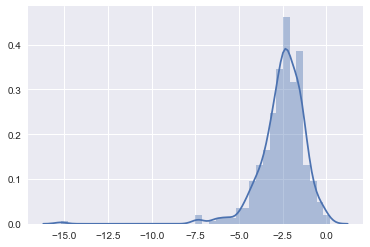

In [35]:
residuals = predictions - y_test

sns.distplot(residuals)

In [36]:
#Create regression tree using PCA


model = regressor.fit(X_train, y_train)

dot_data = tree.export_graphviz(model, out_file=None, feature_names=list(X_train)) 
graph = graphviz.Source(dot_data) 
#graph.render("tree_pca")

predictions = model.predict(X_test)

print("Score:" + str(model.score(X_test, y_test)))

rmse = sqrt(mean_squared_error(y_test, predictions))

print('RMSE:' + str(rmse))

Score:0.2918443320003803
RMSE:1.3036193007425403


C:\Users\lisbe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


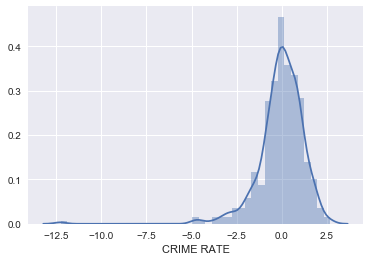

In [37]:
residuals = predictions - y_test

sns.distplot(residuals)